## Import Librarires

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.3.0'

In [3]:
physical_devices = tf.config.experimental.list_physical_devices()
physical_devices

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [4]:
tf.config.experimental.set_memory_growth(physical_devices[2], True)

## Models

In [49]:
def Simple_Dense_Model(train_data, train_label, test_data, test_label, lr, input_shape=(28*28), output_shape=10):
    
    # Flattening and normalizing images
    X_train = train_data.reshape(-1, input_shape).astype('float32') / 255.0
    X_test = test_data.reshape(-1, input_shape).astype('float32') / 255.0
    
    # Model
    model = keras.Sequential([keras.Input(shape=input_shape), #(28*28)
                         keras.layers.Dense(512, activation='relu'),
                         keras.layers.Dense(256, activation='relu'),
                         keras.layers.Dense(output_shape, activation='softmax')])
    print(model.summary())
    
    # Compile
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=keras.optimizers.Adam(lr=lr),
                      metrics=['accuracy'])

    #Fit
    model.fit(X_train, train_label, batch_size=32, epochs=5)
    
    #Evaluate
    model.evaluate(X_test, test_label, batch_size=32)

In [50]:
def CNN(X_train, y_train, X_test, y_test, lr, input_shape=(28,28,1), output_shape=10):
    
    # Flattening and normalizing images
    """Now for Convolution layers we have to reshape our input into a single tenor. That's because the first convolution
    expects a single tensor containing everything, so instead of 60,000 items (size = 28x28x1) in a list, we have a single
    4D list that is 60,000x28x28x1."""
    X_train = X_train.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0
    X_test = X_test.reshape(-1, input_shape[0], input_shape[1], input_shape[2]).astype('float32') / 255.0
    
    # Model
    model = keras.Sequential([keras.Input(shape=input_shape), #(32,32,3)
                              keras.layers.Conv2D(32, (3,3), padding='valid', activation='relu'),
                              keras.layers.MaxPooling2D(pool_size=(2,2)),
                              keras.layers.Conv2D(64, (3,3), padding='valid', activation='relu'),
                              keras.layers.MaxPooling2D(pool_size=(2,2)),
                              keras.layers.Conv2D(128, (3,3), padding='valid', activation='relu'),
                              keras.layers.Flatten(),
                              keras.layers.Dense(64, activation='relu'),
                              keras.layers.Dense(output_shape, activation='softmax')])
    print(model.summary())
    
    # Compile
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=keras.optimizers.Adam(lr=lr),
                      metrics=['accuracy'])

    #Fit
    model.fit(X_train, y_train, batch_size=32, epochs=5)
    
    #Evaluate
    model.evaluate(X_test, y_test, batch_size=32)

In [82]:
def RNN(X_train, y_train, X_test, y_test, lr, input_shape=(28,28), output_shape=10):
    
    # Flattening and normalizing images
    X_train = X_train.reshape(-1, input_shape[0], input_shape[1]).astype('float32') / 255.0
    X_test = X_test.reshape(-1, input_shape[0], input_shape[1]).astype('float32') / 255.0
    
    # Model
    model = keras.Sequential([keras.Input(shape=(None, input_shape[1])), #(None,28)
                             keras.layers.SimpleRNN(256, return_sequences=True, activation='relu'),
                             keras.layers.SimpleRNN(256, activation='relu'),
                             keras.layers.Dense(output_shape, activation='softmax')])
    print(model.summary())
    
    # Compile
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=keras.optimizers.Adam(lr=lr),
                      metrics=['accuracy'])

    #Fit
    model.fit(X_train, y_train, batch_size=32, epochs=5)
    
    #Evaluate
    model.evaluate(X_test, y_test, batch_size=32)

# MNIST Data

In [10]:
from keras.datasets import mnist
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

In [11]:
X_train_mnist.shape

(60000, 28, 28)

### Visualize

[]

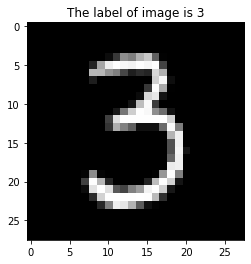

In [12]:
x=50
plt.title("The label of image is "+str(y_train_mnist[x]))
plt.imshow(X_train_mnist[x], cmap='gray')
plt.plot()

## Simple Dense Model

In [13]:
Simple_Dense_Model(X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist, lr=0.001)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1854 - accuracy: 0.9437
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0784 - accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0549 - accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - los

The training test accuracy is **98.88%** and test set accuracy is **97.89%**

## CNN

In [14]:
CNN(X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist, lr=0.001)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

The training test accuracy is **99.4%** and test set accuracy is **99.17%**

## RNN

Images(28*28) will go in row by row("28 rows, each row at a time")

In [15]:
RNN(X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist, lr=0.001)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 256)         72960     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 206,858
Trainable params: 206,858
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3012 - accuracy: 0.9077
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1486 - accuracy: 0.9594
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1234 - accuracy: 0.9662
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/

The training test accuracy is **97.35%** and test set accuracy is **97.51%**

# Lets try on MNIST Fashion dataset
Dataset of images of 10 different classes
- 60000 training images
- 10000 test images
- 28*28 pixels

In [20]:
from keras.datasets import fashion_mnist
(X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

In [21]:
X_train_fashion.shape

(60000, 28, 28)

### Visualize

[]

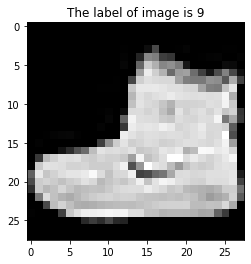

In [22]:
x=0
plt.title("The label of image is "+str(y_train_fashion[x]))
plt.imshow(X_train_fashion[x], cmap='gray')
plt.plot()

## Simple Dense Model

In [23]:
Simple_Dense_Model(X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion, lr=0.001)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4659 - accuracy: 0.8303
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3535 - accuracy: 0.8696
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3190 - accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - l

The training test accuracy is **89.62%** and test set accuracy is **87.24%**

## CNN

In [26]:
CNN(X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion, lr=0.001)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

The training test accuracy is **92.22%** and test set accuracy is **90.82%**

## RNN

In [27]:
RNN(X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion, lr=0.001)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 256)         72960     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 206,858
Trainable params: 206,858
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.6536 - accuracy: 0.7633
Epoch 2/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.4616 - accuracy: 0.8375
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.4141 - accuracy: 0.8496
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/

The training test accuracy is **86.76%** and test set accuracy is **86.13%**

### CIFAR10
Dataset of natural images of 10 different classes
- 50000 training images
- 10000 test images
- 32*32 pixels RGB

In [54]:
from keras.datasets import cifar10
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar10.load_data()

In [55]:
X_train_cifar.shape

(50000, 32, 32, 3)

### Visualize

[]

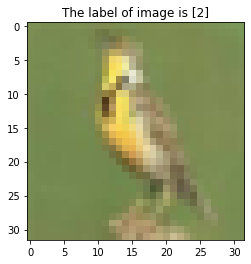

In [66]:
x=990
plt.title("The label of image is "+str(y_train_cifar[x]))
plt.imshow(X_train_cifar[x])
plt.plot()

## Simple Dense Model

In [74]:
Simple_Dense_Model(X_train_cifar, y_train_cifar, X_test_cifar, y_test_cifar, lr=0.001, input_shape=(32*32*3))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8576 - accuracy: 0.3245
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6659 - accuracy: 0.4052
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5897 - accuracy: 0.4308
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step

The training test accuracy is **46.26%** and test set accuracy is **45.94%**

## CNN

In [75]:
CNN(X_train_cifar, y_train_cifar, X_test_cifar, y_test_cifar, lr=0.001, input_shape=(32,32,3))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)              

The training test accuracy is **72.53%** and test set accuracy is **68.29%**

## RNN

Images(32x32x3) will go in row by row("32 rows, each row of size(32*3) at a time")

In [83]:
RNN(X_train_cifar, y_train_cifar, X_test_cifar, y_test_cifar, lr=0.001, input_shape=(32,32*3))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_10 (SimpleRNN)    (None, None, 256)         90368     
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 256)               131328    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                2570      
Total params: 224,266
Trainable params: 224,266
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.9783 - accuracy: 0.2608
Epoch 2/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.7924 - accuracy: 0.3313
Epoch 3/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.7298 - accuracy: 0.3561
Epoch 4/5
1563/1563 [==============================] - 98s 63ms

The training test accuracy is **39.06%** and test set accuracy is **39.55%**

**For these image type of data, the best results are by CNN and the worst results are by RNN for all the 3 datasets. Simple neuaral networks are performing near to the performance of CNN. The accuracy of  all the 3 algorithma can be increased by training for a longer duration.**